In [59]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# Project
## Lung Cancer EDA Analysis 

In [60]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\lung_cancer_dataset.csv")

# Data Info

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   pack_years                 50000 non-null  float64
 4   radon_exposure             50000 non-null  object 
 5   asbestos_exposure          50000 non-null  object 
 6   secondhand_smoke_exposure  50000 non-null  object 
 7   copd_diagnosis             50000 non-null  object 
 8   alcohol_consumption        33338 non-null  object 
 9   family_history             50000 non-null  object 
 10  lung_cancer                50000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.2+ MB


In [62]:
df.shape

(50000, 11)

In [63]:
df.head()

patient_id  age  gender  pack_years radon_exposure asbestos_exposure  \
0      100000   69    Male   66.025244           High                No   
1      100001   32  Female   12.780800           High                No   
2      100002   89  Female    0.408278         Medium               Yes   
3      100003   78  Female   44.065232            Low                No   
4      100004   38  Female   44.432440         Medium               Yes   

  secondhand_smoke_exposure copd_diagnosis alcohol_consumption family_history  \
0                        No            Yes            Moderate             No   
1                       Yes            Yes            Moderate            Yes   
2                       Yes            Yes                 NaN             No   
3                       Yes             No            Moderate             No   
4                        No            Yes                 NaN            Yes   

  lung_cancer  
0          No  
1         Yes  
2         Yes  
3         Yes  
4         Yes

# Data Cleaning & Handling

In [64]:
df["alcohol_consumption"]=df["alcohol_consumption"].fillna(df["alcohol_consumption"].mode()[0])

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df.isna().sum()

patient_id                   0
age                          0
gender                       0
pack_years                   0
radon_exposure               0
asbestos_exposure            0
secondhand_smoke_exposure    0
copd_diagnosis               0
alcohol_consumption          0
family_history               0
lung_cancer                  0
dtype: int64

In [67]:
df.drop(columns=["patient_id"],inplace=True)

In [68]:
df.head()

age  gender  pack_years radon_exposure asbestos_exposure  \
0   69    Male   66.025244           High                No   
1   32  Female   12.780800           High                No   
2   89  Female    0.408278         Medium               Yes   
3   78  Female   44.065232            Low                No   
4   38  Female   44.432440         Medium               Yes   

  secondhand_smoke_exposure copd_diagnosis alcohol_consumption family_history  \
0                        No            Yes            Moderate             No   
1                       Yes            Yes            Moderate            Yes   
2                       Yes            Yes               Heavy             No   
3                       Yes             No            Moderate             No   
4                        No            Yes               Heavy            Yes   

  lung_cancer  
0          No  
1         Yes  
2         Yes  
3         Yes  
4         Yes

In [69]:
# Define age bins and labels
bins = [18, 25, 35, 45, 60, 75, 100]
labels = ["18-25", "26-35", "36-45", "46-60", "61-75", "76+"]

# Create a new column with age groups
df["Age Group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True, include_lowest=True)


# EDA & Visualization

In [70]:
df.head()

age  gender  pack_years radon_exposure asbestos_exposure  \
0   69    Male   66.025244           High                No   
1   32  Female   12.780800           High                No   
2   89  Female    0.408278         Medium               Yes   
3   78  Female   44.065232            Low                No   
4   38  Female   44.432440         Medium               Yes   

  secondhand_smoke_exposure copd_diagnosis alcohol_consumption family_history  \
0                        No            Yes            Moderate             No   
1                       Yes            Yes            Moderate            Yes   
2                       Yes            Yes               Heavy             No   
3                       Yes             No            Moderate             No   
4                        No            Yes               Heavy            Yes   

  lung_cancer Age Group  
0          No     61-75  
1         Yes     26-35  
2         Yes       76+  
3         Yes       76+  
4         Yes     36-45

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        50000 non-null  int64   
 1   gender                     50000 non-null  object  
 2   pack_years                 50000 non-null  float64 
 3   radon_exposure             50000 non-null  object  
 4   asbestos_exposure          50000 non-null  object  
 5   secondhand_smoke_exposure  50000 non-null  object  
 6   copd_diagnosis             50000 non-null  object  
 7   alcohol_consumption        50000 non-null  object  
 8   family_history             50000 non-null  object  
 9   lung_cancer                50000 non-null  object  
 10  Age Group                  50000 non-null  category
dtypes: category(1), float64(1), int64(1), object(8)
memory usage: 3.9+ MB


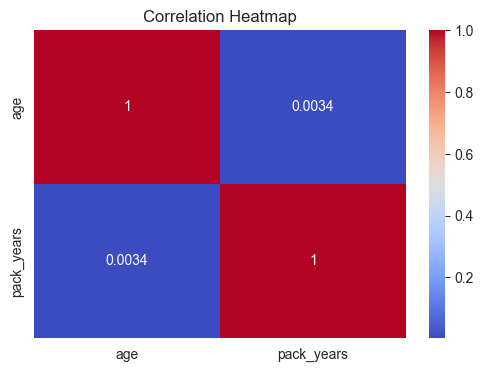

In [75]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Age
fig1 = px.histogram(df, x="age", nbins=50, title="Age Distribution")
fig1.show()

# Distribution of Pack Years
fig2 = px.histogram(df, x="pack_years", nbins=50, title="Pack Years Distribution")
fig2.show()

# Lung Cancer Prevalence by Gender
fig3 = px.histogram(df, x="gender", color="lung_cancer", barmode="group", title="Lung Cancer by Gender")
fig3.show()

# Lung Cancer Prevalence by Age Group
fig4 = px.histogram(df, x="Age Group", color="lung_cancer", barmode="group", title="Lung Cancer by Age Group")
fig4.show()

# Exposure Factors vs Lung Cancer
exposure_cols = ["radon_exposure", "asbestos_exposure", "secondhand_smoke_exposure"]
for col in exposure_cols:
    fig = px.histogram(df, x=col, color="lung_cancer", barmode="group", title=f"Lung Cancer by {col.replace('_', ' ').title()}")
    fig.show()

# COPD Diagnosis vs Lung Cancer
fig5 = px.histogram(df, x="copd_diagnosis", color="lung_cancer", barmode="group", title="COPD Diagnosis vs Lung Cancer")
fig5.show()

# Alcohol Consumption vs Lung Cancer
fig6 = px.histogram(df, x="alcohol_consumption", color="lung_cancer", barmode="group", title="Alcohol Consumption vs Lung Cancer")
fig6.show()

# Family History vs Lung Cancer
fig7 = px.histogram(df, x="family_history", color="lung_cancer", barmode="group", title="Family History vs Lung Cancer")
fig7.show()

# Correlation Heatmap (numerical features only)
numerical_cols = ["age", "pack_years"]
corr = df[numerical_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# People that has the risk of getting Lung cancer 

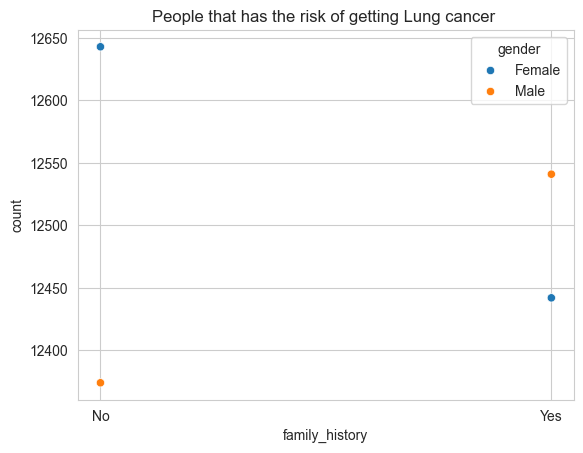

In [73]:
pr_ca = df.groupby(["gender", "family_history"]).size().reset_index(name="count")
sns.scatterplot(data=pr_ca,x="family_history",y="count",hue="gender")
plt.title("People that has the risk of getting Lung cancer ")
plt.show()

# Alcohol consumption by gender and age 

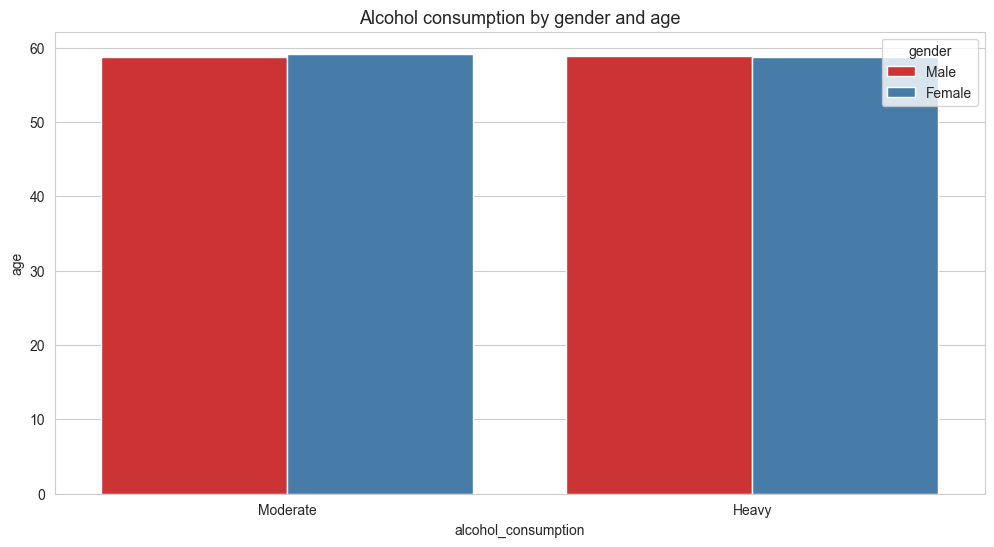

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="alcohol_consumption",y="age",hue='gender',palette="Set1",ci=None)
plt.title("Alcohol consumption by gender and age",size=13)
plt.show()